![](https://i.imgur.com/JsMvGnP.png)


## Exercício de análise exploratória de dados

Neste projeto você irá realizar uma análise estatística exploratória de um dos datasets mais famosos da comunidade de Data Science: o dataset **Titanic**.\
Essa base contém dados de 891 passageiros do Titanic. A análise vai ser guiada pelas perguntas apresentadas no decorrer do notebook.\
Todo o projeto deve ser executado neste Jupyter Notebook. Por fim, se desejar, revise as respostas com o seu mentor.

### Descrição dos dados

O dataset possui 891 registros (linhas) e 12 atributos (colunas).

Abaixo estão as descrições das colunas do nosso Dataset:

* passengerid = ID do passageiro do navio (código primário).
* survived = Se o passageiro sobreviveu ao naufrágio estará como 1, caso contrário estará com 0.
* pclass = Tipo de classe de passagem (do 1 ao 3), sendo 1 a melhor classe.
* name = Nome do passageiro.
* sex = Gênero do passageiro, sendo masculino e feminino.
* age = Idade do passageiro na data da ocorrência do naufrágio.
* sibsp = Número de irmãos / cônjuges a bordo.
* parch = Número de pais / filhos a bordo.
* ticket = Código do ticket.
* fare = Valor da passagem.
* cabin = Código de identificação da Cabine.
* embarked = Local ondem o passageiro embarcou no navio.

#### Carregando os dados

In [27]:
import pandas            as pd
import numpy             as np 
import matplotlib.pyplot as plt
import seaborn           as sns
import warnings
warnings.filterwarnings('ignore')
import re
from statistics import mode
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Carregando os dados
# O arquivo “titanic.csv” deve estar salvo na mesma pasta do seu código Python
dados = pd.read_csv("titanic.csv")

# Exibe o número de linhas e colunas
print(dados.shape)

# Exibe as 10 primeiras linhas
dados.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 1. Qual foi a proporção de passageiros sobreviventes?

Dica: use a função value_counts() do pandas com o parâmetro _normalize_

In [7]:
# Seu código

dados['Survived'].value_counts(normalize = True)



0    0.616162
1    0.383838
Name: Survived, dtype: float64

#### 2. Qual era a faixa etária dos passageiros que estavam no Titanic?

In [8]:
# Seu código

In [9]:
dados['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
# Min. 0.42
# Max. 80.0

#### 3. Qual porcentagem de homens e mulheres sobreviventes?

In [11]:
# Seu código


dados.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

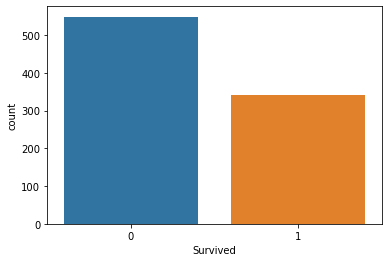

In [12]:
sns.countplot(x='Survived',data=dados)

# 0 = NÃO Sobreviveu
# 1 = Sobreviveu

Porcentagem de Mulheres que sobreviveram:  74.20382165605095
Porcentagem de Homens que sobreviveram:    18.890814558058924


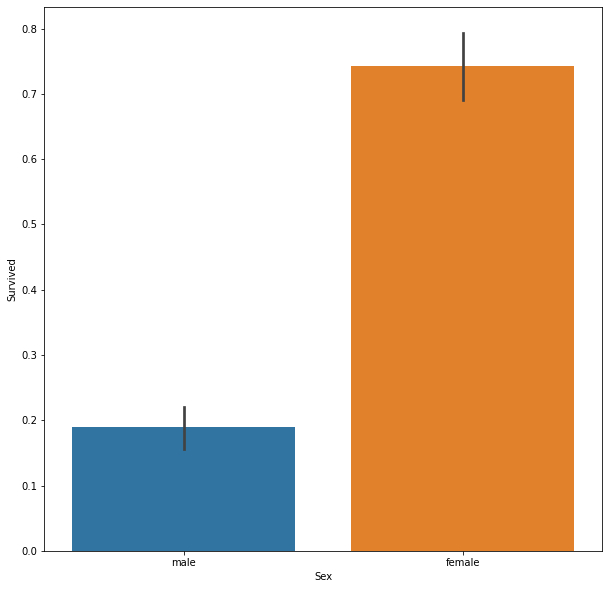

In [13]:
fig = plt.figure(figsize=(10,10))

sns.barplot(x="Sex", y="Survived", data= dados)

print("Porcentagem de Mulheres que sobreviveram: ", dados["Survived"][dados["Sex"] == 'female'].
      value_counts(normalize = True)[1]*100)


print("Porcentagem de Homens que sobreviveram:   ", dados["Survived"][dados["Sex"] == 'male'].
      value_counts(normalize = True)[1]*100)


#### 4. Quais os tipos de variáveis nas colunas survived, pclass, name, sex e age?

[Dica ...](http://professorguru.com.br/estatistica/introdu%C3%A7%C3%A3o%20%C3%A0%20estat%C3%ADstica/tipos%20de%20vari%C3%A1veis%20estat%C3%ADsticas.html)

In [14]:
# Seu código
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
dados.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
# Resposta excluída propositalmente

#### 5. Qual o tipo de classe de passagem mais frequente nos dados?

In [17]:
# O campo "Pclass" está dividido entre"
# "1a_classe", 
# "2a_classe", 
# "3a_classe"

# Será usado a Função Dummies para colocar "0" ou "1" dependo da classe Pclass

class_map = {1: "1a_classe", 2: "2a_classe", 3: "3a_classe"}

dados["Pclass"] = dados["Pclass"].map(class_map)

ohe = ["Pclass", "Sex", "Embarked"]

for column in ohe:
    
    dummies = pd.get_dummies(dados[column])

    dados = pd.concat([dados, dummies], axis= 1)
    
    dados = dados.drop(columns = [column])
       
dados
                

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,1a_classe,2a_classe,3a_classe,female,male,C,Q,S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,1,0,0,1,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,0,0,1,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1,1,0,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,0,0,0,1,1,0,0


In [18]:
# Número de passageiros da "1a_Classe"

dados['1a_classe'].value_counts()


0    675
1    216
Name: 1a_classe, dtype: int64

In [19]:
# Número de passageiros da "2a_Classe"

dados['2a_classe'].value_counts()


0    707
1    184
Name: 2a_classe, dtype: int64

In [20]:
# Número de passageiros da "3a_Classe"

dados['3a_classe'].value_counts()

1    491
0    400
Name: 3a_classe, dtype: int64

#### 6. Qual a média e desvio padrão do valor das passagens?

In [21]:
dados['Fare'].describe()


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:>

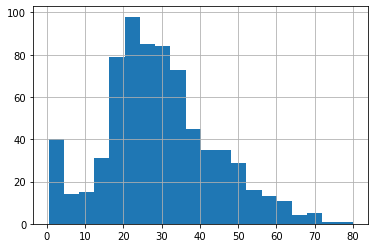

In [22]:
dados["Age"].hist(bins=20)

#### 7. Existem outliers na coluna age? Quais? Crie um boxplot para esse atributo.

In [23]:
dados.isnull().sum()

PassengerId      0
Survived         0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
1a_classe        0
2a_classe        0
3a_classe        0
female           0
male             0
C                0
Q                0
S                0
dtype: int64

In [24]:
# Note que o campo Age = 177 ==> está incompleto!!

#### 8. Cria um histograma para os atributos age, pclass e fare. Quais informações você pode extrair desses gráficos?


In [25]:
# Seu código:

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

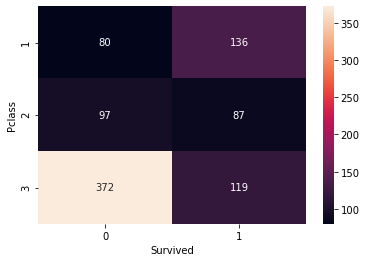

In [28]:
# Group the dataset by Pclass and Survived and then unstack them
group = dados.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
  
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

In [ ]:
dados["Age"].hist(bins = 30)

# O histograma fornece uma representação visual rápida da frequência das diferentes faixas etárias,
# incluindo as crianças e bebes.
# Parece que o valor mais comum (modal) de idade é um pouco mais de 20 anos.



In [ ]:
dados["Pclass"].hist(bins = 20)

# A classe de passagem de um passageiro (uma representação do status socioeconômico)
# é outra variável interessante a ser considerada em conjunto com sexo e sobrevivência. 
# A Primeira Classe (216 pessaos) ficou na segunda posiçao do gråfico,
# A secunda classe (184 pessoas) foi a menor 
# E finalmente, a terceira classe,  (491 pessoas) foi a maior represntaçao no gráfico


In [ ]:
dados["Fare"].hist(bins = 30)
# O gråfico do Preço da Passagem, também é um indicador da classe 
# socio-economica, mostrando a concentração no maior valor da passagem foi
# o indice mais alto,


Ótimo trabalho!